In [6]:
from SciPyFST import fst, fstUtils
import graphviz
from IPython.display import display, Markdown

mealy_fst = {
        "states": ['GB', 'b|e', 'GE'],
        "initState": 'GB',
        "inAlphabet": [],
        "outAlphabet": [],
        "transitionFunction": [['GB', 'skip', 'GB'], ['GB', 'ε', 'b|e'], ['b|e', 'ε', 'b|e'], ['b|e', 'ε', 'GE'], ['b|e', 'appeal_appellant;line0', 'title']],
        "outputFunction": [],
        "finalStates": ['GE']
    }

brainMealy = fst(initState=mealy_fst['initState'],
                 states=mealy_fst['states'],
                 transitionFunction=mealy_fst['transitionFunction'],
                 outputFunction=[],
                 finalStates=mealy_fst['finalStates'])

In [85]:
table = Markdown(fstUtils.toMdTable(brainMealy))
display(table)

| Input \ State | GB | GE | b|e | title |
|:---:|:---:|:---:|:---:|:---:|
| appeal_appellant;line0 | - | - | title | - |
| skip | GB | - | - | - |
| ε | b|e | - | b|e, GE | - |


In [86]:
graph = graphviz.Source(fstUtils.toDot(brainMealy))

In [7]:
print(graph)


display(fstUtils.toDot(brainMealy))
# graph.view()

graph {
	0 [label="0:x"]
	1 [label="1:y"]
	2 [label="2:z"]
	3 [label="3:w"]
	0 -- 1 [label=a]
	0 -- 2 [label=b]
	1 -- 0 [label=a]
	1 -- 3 [label=b]
	2 -- 3 [label=a]
	2 -- 0 [label=b]
	3 -- 2 [label=a]
	3 -- 1 [label=b]
}



'digraph fst {\n\trankdir=LR;\n\tnode [shape=point]; start;\n\tnode [shape=circle];\n\t"GB" [label="GB"];\n\tstart -> "GB" [label=start];\n\tnode [shape=circle];\n\t"GE" [shape=doublecircle, label="GE"];\n\t"b|e" [label="b|e"];\n\t"title" [label="title"];\n\tnode [style=filled, fillcolor=hotpink];\n\t"GB" -> "GB" [label=skip];\n\t"GB" -> "b|e" [label=ε];\n\t"b|e" -> "b|e" [label=ε];\n\t"b|e" -> "GE" [label=ε];\n\t"b|e" -> "title" [label=appeal_appellant;line0];\n}'

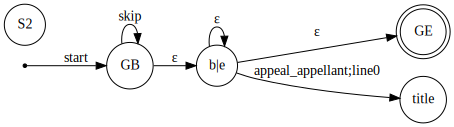

In [88]:
brainMealy.addState('S2')
display(graphviz.Source(fstUtils.toDot(brainMealy)))

In [1]:
class SoftMealy:
    def __init__(self, states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunction, finalStates):
        self.states = states
        self.initState = initState
        self.inAlphabet = inAlphabet
        self.outAlphabet = outAlphabet
        self.transitions = transitionFunction
        self.outputs = outputFunction
        self.finalStates = finalStates
        self.current_state = initState

    def step(self, input_symbol):
        print(self.transitions[self.current_state, input_symbol])
        print(self.current_state)
        if self.transitions[self.current_state, input_symbol] is None:
            raise ValueError("Invalid input symbol")

        next_state = self.transitions[self.current_state, input_symbol]
        output = self.outputs[self.current_state, input_symbol]
        self.current_state = next_state
        return output

    def reset(self, start_state):
        self.current_state = start_state

In [44]:
transitions = {
    (0, 'a'): 1,
    (0, 'b'): 2,
    (1, 'a'): 0,
    (1, 'b'): 3,
    (2, 'a'): 3,
    (2, 'b'): 0,
    (3, 'a'): 2,
    (3, 'b'): 1
}

outputs = {
    (0, 'a'): 'x',
    (0, 'b'): 'y',
    (1, 'a'): 'y',
    (1, 'b'): 'z',
    (2, 'a'): 'z',
    (2, 'b'): 'x',
    (3, 'a'): 'w',
    (3, 'b'): 'w'
}


In [45]:
start_state = 0
mealy = SoftMealy(transitions, outputs, start_state)


In [47]:
input_seq = ['a', 'b', 'a', 'b']
# output_seq = []
# for symbol in input_seq:
#     output = mealy.step(symbol)
#     print(output)

output_seq = [mealy.step(symbol) for symbol in input_seq]
print(output_seq)


1
0
3
1
2
3
0
2
['x', 'z', 'w', 'x']


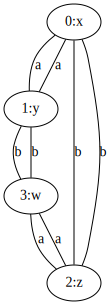

In [1]:
from graphviz import Graph

graph = Graph()

graph.node('0', '0:x')
graph.node('1', '1:y')
graph.node('2', '2:z')
graph.node('3', '3:w')

graph.edge('0', '1', label='a')
graph.edge('0', '2', label='b')
graph.edge('1', '0', label='a')
graph.edge('1', '3', label='b')
graph.edge('2', '3', label='a')
graph.edge('2', '0', label='b')
graph.edge('3', '2', label='a')
graph.edge('3', '1', label='b')

# graph.view()
display(graph)
# graph.render('softmealy')

In [17]:
from graphviz import Digraph
# Define the transition and output functions
def transition_function(state, input_symbol):
    if state == 0 and input_symbol == 0:
        return 1
    elif state == 0 and input_symbol == 1:
        return 2
    elif state == 1 and input_symbol == 0:
        return 0
    elif state == 1 and input_symbol == 1:
        return '\u016A'
    elif state == 2 and input_symbol == 0:
        return '\u016A'
    elif state == 2 and input_symbol == 1:
        return 0
    elif state == '\u016A' and input_symbol == 0:
        return 2
    elif state == '\u016A' and input_symbol == 1:
        return 1

def output_function(state, input_symbol):
    if state == 0 and input_symbol == 0:
        return 'x'
    elif state == 0 and input_symbol == 1:
        return 'y'
    elif state == 1 and input_symbol == 0:
        return 'a'
    elif state == 1 and input_symbol == 1:
        return 'b'
    elif state == 2 and input_symbol == 0:
        return 'b'
    elif state == 2 and input_symbol == 1:
        return 'a'
    elif state == '\u016A' and input_symbol == 0:
        return 'z'
    elif state == '\u016A' and input_symbol == 1:
        return 'w'

# Create a SoftMealy object
input_alphabet = {'Ititle', 'Iid', 'Otitle', 'Oid', 'ε'}
output_alphabet = {'Otitle', 'Oid'}
transition = {('GB', 'Ititle'): 'title',
              ('title', 'Otitle'): 'dummy/title',
              ('dummy/title', 'Iid'): 'id',
              ('id', 'Oid'): 'dummy/id',
              ('dummy/id', 'ε'): 'GE'}
output = {}
states = ['GB', 'title', 'dummy/title', 'id', 'dummy/id', 'GE']
mealy = SoftMealy(
    states=states,
    initState='GB',
    inAlphabet=input_alphabet,
    outAlphabet=output_alphabet,
    transitionFunction=transition,
    outputFunction=output,
    finalStates='GE'
)

# Create a Graphviz Digraph object
dot = Digraph()

# Add the nodes to the Digraph
for state in mealy.states:
    if state == mealy.finalStates:
        dot.node(str(state), label=str(state), shape='doublecircle')
    else:
        dot.node(str(state), label=str(state), shape='circle')

# Add the edges to the Digraph
for state in mealy.states:
    for symbol in input_alphabet:
        print(mealy.transitions)
        if (state, symbol) in mealy.transitions:
            next_state = mealy.transitions[state, symbol]
            output = ""
            dot.edge(str(state), str(next_state), label=f"{symbol}")

# Render the Digraph to a PDF file
# dot.render('softmealy', format='pdf')
dot.attr(rankdir='LR')
display(dot)

('GB', 'Ititle')


AttributeError: 'tuple' object has no attribute 'get'

{('GB', 'Ititle'): 'title', ('title', 'Otitle'): 'dummy/title', ('title', 'extract'): 'title', ('dummy/title', 'Iid'): 'id', ('dummy/title', 'skip'): 'dummy/title', ('id', 'Oid'): 'dummy/id', ('dummy/id', 'ε'): 'GE'}
5
title
dummy/title
title
id
dummy/title
dummy/id
GE


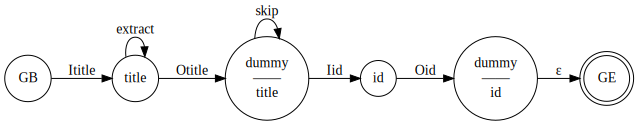

In [10]:
from graphviz import Digraph

# Create a SoftMealy object
input_alphabet = {}
output_alphabet = {}
transition = {('GB', 'Ititle'): 'title',
              ('title', 'Otitle'): 'dummy/title',
              ('title', 'extract'): 'title',
              ('dummy/title', 'Iid'): 'id',
              ('dummy/title', 'skip'): 'dummy/title',
              ('id', 'Oid'): 'dummy/id',
              ('dummy/id', 'ε'): 'GE'}
output = {}
states = ['GB', 'title', 'dummy/title', 'id', 'dummy/id', 'GE']
mealy = SoftMealy(
    states=states,
    initState='GB',
    inAlphabet=input_alphabet,
    outAlphabet=output_alphabet,
    transitionFunction=transition,
    outputFunction=output,
    finalStates='GE'
)

# Create a Graphviz Digraph object
dot = Digraph()

# Add the nodes to the Digraph
for state in mealy.states:
    if state == mealy.finalStates:
        dot.node(str(state), label=str(state), shape='doublecircle')
    else:
        if 'dummy' in state:
            slash = '—'
            if len(state.split('/')[0]) > len(state.split('/')[1]):
                length = len(state.split('/')[0])
            else:
                length = len(state.split('/')[1])
            for i in range(1, length-3):
                slash += '—'
            state = state.split('/')[0] + '\n' + slash + '\n' + state.split('/')[1]
        dot.node(str(state), label=str(state), shape='circle')

# Add the edges to the Digraph
print(mealy.transitions)
print(len('dummy'))
for transition in mealy.transitions:
    # print(transition)
    state = transition[0]
    symbol = transition[1]
    # print(state)
    # print(symbol)
    next_state = mealy.transitions[state, symbol]
    print(next_state)
    if 'dummy' in state:
        slash = '—'
        if len(state.split('/')[0]) > len(state.split('/')[1]):
            length = len(state.split('/')[0])
        else:
            length = len(state.split('/')[1])
        for i in range(1, length-3):
            slash += '—'
        state = state.split('/')[0] + '\n' + slash + '\n' + state.split('/')[1]

    if 'dummy' in next_state:
        slash = '—'
        if len(next_state.split('/')[0]) > len(next_state.split('/')[1]):
            length = len(next_state.split('/')[0])
        else:
            length = len(next_state.split('/')[1])
        for i in range(1, length-3):
            slash += '—'
        next_state = next_state.split('/')[0] + '\n' + slash + '\n' + next_state.split('/')[1]
    dot.edge(str(state), str(next_state), label=f"{symbol}")
dot.attr(rankdir='LR')
display(dot)

In [23]:
my_dict = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}

# print(my_dict.items())

if ('key1', 'value1') in my_dict.items():
    print("存在 {'key1': 'value1'}")
else:
    print("不存在 {'key1': 'value1'}")

if ('key4', 'value4') in my_dict.items():
    print("存在 {'key4': 'value4'}")
else:
    print("不存在 {'key4': 'value4'}")

存在 {'key1': 'value1'}
不存在 {'key4': 'value4'}


In [3]:
my_dict = [{('GB', 'Ititle'): 'title'}]

# 使用 for 循环遍历字典的键并打印
for key in my_dict:
    for k in key:
        key1=k.__getitem__(0)
        print(key1)
    print(key)

GB
{('GB', 'Ititle'): 'title'}


In [1]:
transitions = [['GB', 'skip', 'GB'], ['GB', 'Ititle', 'title'], ['title', 'extract', 'title'], ['title', 'Otitle', 'dummy/title'], ['dummy/title', 'skip', 'dummy/title'], ['dummy/title', 'Iid', 'id'], ['id', 'extract', 'id'], ['id', 'Oid', 'dummy/id'], ['dummy/id', 'skip', 'dummy/id'], ['dummy/id', 'Iappeal_appellant', 'appeal.appellant'], ['appeal.appellant', 'extract', 'appeal.appellant'], ['appeal.appellant', 'Oappeal_appellant', 'dummy/appeal.appellant'], ['dummy/appeal.appellant', 'skip', 'dummy/appeal.appellant'], ['dummy/appeal.appellant', 'Iappeal_LR', 'appeal.legal_representative'], ['appeal.legal_representative', 'extract', 'appeal.legal_representative'], ['appeal.legal_representative', 'Oappeal_LR', 'dummy/appeal.legal_representative'], ['dummy/appeal.legal_representative', 'skip', 'dummy/appeal.legal_representative'], ['dummy/appeal.legal_representative', 'Iappealed_appellee', 'appealed.appellee'], ['appealed.appellee', 'extract', 'appealed.appellee'], ['appealed.appellee', 'Oappealed_appellee', 'dummy/appealed.appellee'], ['dummy/appealed.appellee', 'skip', 'dummy/appealed.appellee'], ['dummy/appealed.appellee', 'Iforeword', 'foreword'], ['foreword', 'extract', 'foreword'], ['foreword', 'Oforeword', 'dummy/foreword'], ['dummy/foreword', 'skip', 'dummy/foreword'], ['dummy/foreword', 'Imain_content', 'main_content'], ['main_content', 'extract', 'main_content'], ['main_content', 'Omain_content', 'dummy/main_content'], ['dummy/main_content', 'skip', 'dummy/main_content'], ['dummy/main_content', 'Ireason', 'reason'], ['reason', 'extract', 'reason'], ['reason', 'Oreason', 'dummy/reason'], ['dummy/reason', 'skip', 'dummy/reason'], ['dummy/reason', 'Ireason', 'reason'], ['dummy/reason', 'Idate', 'date'], ['date', 'extract', 'date'], ['date', 'Odate', 'dummy/date'], ['dummy/date', 'skip', 'dummy/date'], ['dummy/date', 'Icourt_number', 'court_number'], ['court_number', 'extract', 'court_number'], ['court_number', 'Ocourt_number', 'dummy/court_number'], ['dummy/court_number', 'skip', 'dummy/court_number'], ['dummy/court_number', 'Ipresiding_judge', 'presiding_judge'], ['presiding_judge', 'extract', 'presiding_judge'], ['presiding_judge', 'Opresiding_judge', 'dummy/presiding_judge'], ['dummy/presiding_judge', 'skip', 'dummy/presiding_judge'], ['dummy/presiding_judge', 'ε', 'GE'], ['dummy/appeal.appellant', 'Iforeword', 'foreword'], ['dummy/presiding_judge', 'Ijudge', 'judge'], ['judge', 'extract', 'judge'], ['judge', 'Ojudge', 'dummy/judge'], ['dummy/judge', 'skip', 'dummy/judge'], ['dummy/judge', 'Ijudge', 'judge'], ['dummy/judge', 'Iclerk', 'clerk'], ['clerk', 'extract', 'clerk'], ['clerk', 'Oclerk', 'dummy/clerk'], ['dummy/clerk', 'skip', 'dummy/clerk'], ['dummy/clerk', 'ε', 'GE'], ['dummy/appeal.appellant', 'Iappeal_attorney', 'appeal.attorney'], ['appeal.attorney', 'extract', 'appeal.attorney'], ['appeal.attorney', 'Oappeal_attorney', 'dummy/appeal.attorney'], ['dummy/appeal.attorney', 'skip', 'dummy/appeal.attorney'], ['dummy/appeal.attorney', 'Iappealed_appellee', 'appealed.appellee'], ['dummy/appealed.appellee', 'Iappealed_representative', 'appealed.representative'], ['appealed.representative', 'extract', 'appealed.representative'], ['appealed.representative', 'Oappealed_representative', 'dummy/appealed.representative'], ['dummy/appealed.representative', 'skip', 'dummy/appealed.representative'], ['dummy/appealed.representative', 'Iappealed_attorney', 'appealed.attorney'], ['appealed.attorney', 'extract', 'appealed.attorney'], ['appealed.attorney', 'Oappealed_attorney', 'dummy/appealed.attorney'], ['dummy/appealed.attorney', 'skip', 'dummy/appealed.attorney'], ['dummy/appealed.attorney', 'Iforeword', 'foreword'], ['dummy/date', 'Ijudge', 'judge']]
if 'GB' not in (print(t) for t in transitions):
    print('ok')

['GB', 'skip', 'GB']
['GB', 'Ititle', 'title']
['title', 'extract', 'title']
['title', 'Otitle', 'dummy/title']
['dummy/title', 'skip', 'dummy/title']
['dummy/title', 'Iid', 'id']
['id', 'extract', 'id']
['id', 'Oid', 'dummy/id']
['dummy/id', 'skip', 'dummy/id']
['dummy/id', 'Iappeal_appellant', 'appeal.appellant']
['appeal.appellant', 'extract', 'appeal.appellant']
['appeal.appellant', 'Oappeal_appellant', 'dummy/appeal.appellant']
['dummy/appeal.appellant', 'skip', 'dummy/appeal.appellant']
['dummy/appeal.appellant', 'Iappeal_LR', 'appeal.legal_representative']
['appeal.legal_representative', 'extract', 'appeal.legal_representative']
['appeal.legal_representative', 'Oappeal_LR', 'dummy/appeal.legal_representative']
['dummy/appeal.legal_representative', 'skip', 'dummy/appeal.legal_representative']
['dummy/appeal.legal_representative', 'Iappealed_appellee', 'appealed.appellee']
['appealed.appellee', 'extract', 'appealed.appellee']
['appealed.appellee', 'Oappealed_appellee', 'dummy/appe